(lecture04:scatter)=
# Scatter plots

Scatter plots are a nice way to investigate if there are correlations between measured scalar variables.
To see what they are, let's load the standard libraries:

In [9]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

And let's also download a dataset we introduced in {ref}`lecture03:pandas`:

In [10]:
!curl -O 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/temp_price.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4126  100  4126    0     0  17264      0 --:--:-- --:--:-- --:--:-- 17336


Let's load the file:

In [11]:
import pandas as pd
temp_price = pd.read_csv('temp_price.csv')
temp_price.head().round(2)

,household,date,score,t_out,t_unit,hvac,price,Price per week,Price per day
0,a1,2019-01-06,85,38.6,71.58,35.11,0.17,6.08,0.87
1,a10,2019-01-06,70,38.6,73.29,63.95,0.17,11.07,1.58
2,a11,2019-01-06,61,38.6,74.25,147.61,0.17,25.54,3.65
3,a12,2019-01-06,65,38.6,73.71,74.39,0.17,12.87,1.84
4,a13,2019-01-06,66,38.6,73.55,173.10,0.17,29.95,4.28


We are going to clean them up as we did before:

In [12]:
clean_data = temp_price.dropna(axis=0).rename(columns={'Price per week': 'week_price',
                                                       'Price per day': 'daily_price'})
clean_data.head().round(2)

,household,date,score,t_out,t_unit,hvac,price,week_price,daily_price
0,a1,2019-01-06,85,38.6,71.58,35.11,0.17,6.08,0.87
1,a10,2019-01-06,70,38.6,73.29,63.95,0.17,11.07,1.58
2,a11,2019-01-06,61,38.6,74.25,147.61,0.17,25.54,3.65
3,a12,2019-01-06,65,38.6,73.71,74.39,0.17,12.87,1.84
4,a13,2019-01-06,66,38.6,73.55,173.10,0.17,29.95,4.28


Notice that the dataset includes only one day, 01/06/2019, and that the average temperature is 38.6 degrees F.
We have 50 different records each one corresponding to a different appartment in the same residential building.

Let us see first, how energy consumption `hvac` correlates with the weekly bill `week_price`.

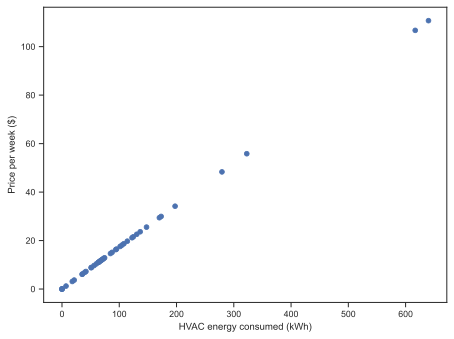

In [13]:
fig, ax = make_full_width_fig()
ax.scatter(clean_data['hvac'], clean_data['week_price'])
ax.set_xlabel('HVAC energy consumed (kWh)')
ax.set_ylabel('Price per week ($)')
save_for_book(fig, 'ch4.fig5');

This kind of plot is called a "scatter plot."
Okay, this makes sense. The more energy energy a unit consumes the higher the energy bill.
The relationship between the two is linear reflecting the fact that each household is paying for the same price per kWh.

The relationship depicted here is also **causal**.
The energy is consumption is causing the bill to be higher.
However, this causality direction does not come from the data alone.
It comes from us using our knowledge about how energy bills are calculated...

What other causal relationships could we have?
Let's look at the temperature of eafch household `t_unit` vs the energy consumed `hvac`.
Here is the scatter plot:

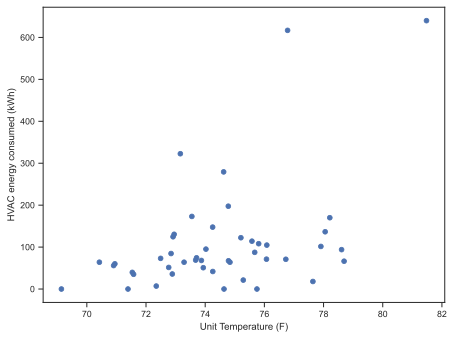

In [14]:
fig, ax = make_full_width_fig()
ax.scatter(clean_data['t_unit'], clean_data['hvac'])
ax.set_xlabel('Unit Temperature (F)')
ax.set_ylabel('HVAC energy consumed (kWh)')
save_for_book(fig, 'ch4.fig6');

We observe that higher unit temperature, in general, leads to higher HVAC energy consumption.
However, the relation is not one-to-one.
This is because the appartments in this building have different physical characteristics.
For example, an appartment that is at the corner of the the building has more of its external surfaces exposed to the environment and thus it needs more energy to maintain a given temperature than an appartment that is, say, in the middle of the building.
As a matter of fact, notice that there are some appartments that consume zero energy even though the external temperature is 38 degrees F.
These guys are getting their heating for free from their neighbors!

So, the relationship between unit temperature and HVAC energy consumption is causal to some degree.
But there are other variables that affect it as well.
Here, these are: the physical characteristics of the appartment and the temperature of the neighboring units.
More often than not, this is the situation we find ourselves when dealing with real datasets.

## Question

In the code block below, do the scatter plot between unit temperature `t_unit` and the variable `score`.
The variable `score` is a measure we developed in our NSF project to characterize how well occupants behave related to energy consumption.
It is a number between zero and 100.
The bigger the score, the better the household is at conserving energy.
Note that we calculate this score using the detailed behavior of the household during an entire week.
We look at things like the temperature setpoint the occupants pick when they are home during the day, when they sleep, and when they are away.
We do not just look at the unit temperature.
Think:
+ Is there a correlation between `t_unit` and `score`?
+ Based on what I told you about the calculation of the `score`, is there a causal relationship beteween the variables?

In [15]:
# Your code here